<a href="https://colab.research.google.com/github/hideyuki-ogawa/analyst-agent-test-books/blob/main/sys_analytics_recall_20240515.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00


In [ ]:
from openai import OpenAI
from google.colab import userdata
import pandas as pd
import numpy as np
openai_api_key = userdata.get('openai_api_key')
oai_client = OpenAI(api_key = openai_api_key)

In [ ]:
np.random.seed(42)
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': np.random.randint(20, 40, 5),
    'income': np.random.normal(50000, 10000, 5),
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'Sydney']
}

# DataFrameを作成
df = pd.DataFrame(data)

# 'income'列を整数に変換
df['income'] = df['income'].astype(int)
df.to_csv('data.csv', index=False)

print(df)

      name  age  income      city
0    Alice   26   38881  New York
1      Bob   39   53189    London
2  Charlie   34   52790     Paris
3    David   30   60105     Tokyo
4      Eve   27   44191    Sydney


In [ ]:
system_call = """"
あなたは、データ分析タスクを支援するためのPythonコードを生成するAIアシスタントです。
ユーザーからの要求に基づいて、与えられたデータを活用し、以下の要件に従ってPythonコードを提供してください。

コード生成の要件:
1. コードはシンプルで読みやすいものにしてください。
2. 変数名や関数名は明確で説明的なものを使用してください。
3. 必要に応じて、コメントを追加して、コードの機能や目的を説明してください。
4. 標準ライブラリを積極的に活用してください。外部ライブラリを使用する場合は、その理由を明確にしてください。
5. ユーザー入力が必要な場合は、入力の形式と例を明示し、入力のバリデーションを行ってください。
6. エラーハンドリングを適切に行い、わかりやすいエラーメッセージを提供してください。
7. コードの実行結果を分かりやすく出力または説明してください。

実行環境について:
- 実行したコードはglobalにcontextを持っています。
- contextには、タスクに関連するデータやオブジェクトが格納されています。
- 必要なデータはcontextから取得し、効果的に活用してください。
- データの形式や内容が不明な場合は、clarificationを求めてください。

コードブロックを作成する際は、以下の形式に従ってください。
```python
# ここにPythonコードを記述```

データ分析のベストプラクティスに従い、効率的で再現可能なコードを心がけてください。
ユーザーとのやり取りを通じて、タスクの要件を明確にし、適切なソリューションを提供してください。

"""
model='gpt-3.5-turbo'
prompt_history = []
context = {}

def llm_response(messages, model):
    res = oai_client.chat.completions.create(
        model=model,
        messages=messages
    )
    return res


def run_agent(user_prompt, filename="", system_call=system_call, model=model):
    global context
    if prompt_history == []:

        prompt_history.append({"role": "system", "content": system_call})

    if filename != '':
        user_prompt += f"""
        # 入力データ:ファイルパス
            {filename}
            入力データがあればそれも活用してください。
        """

    prompt_history.append({"role": "user", "content": user_prompt})
    try:
        res = llm_response(prompt_history, model)
    except Exception as e:
        print(e)

    res_message = res.choices[0].message
    prompt_history.append({'role': res_message.role, 'content': res_message.content})

    if "```python" in res_message.content:
        python_codes = res_message.content.split("```python")[1:]
        for code in python_codes:
            code = code.split("```")[0]
            try:
                print(res_message.content.strip())
                exec(code, context)
            except Exception as e:
                print(f"Error: {e}")
    else:
        print(res_message.content.strip())

In [ ]:
run_agent('こんにちは')

こんにちは！データ分析タスクのお手伝いをします。どのような作業をお手伝いしましょうか？データセットの分析、前処理、可視化、統計解析など、お考えの内容を教えていただけますか？


In [ ]:
run_agent('次のファイルパスのcsvをpandasのdataframeとして読み込んでください。', 'data.csv')

了解です。では、指定されたファイルパスのCSVファイルをPandasのDataFrameとして読み込んでみましょう。データを扱いやすくするため、必要に応じてデータの中身を確認しておきます。それでは、以下がコードになります。

```python
import pandas as pd

# ファイルパス
file_path = "data.csv"

try:
    # CSVファイルをDataFrameとして読み込む
    df = pd.read_csv(file_path)
    
    # データの最初の数行を表示して確認
    print(df.head())
    
except FileNotFoundError:
    print("指定されたファイルが見つかりません。ファイルパスを確認してください。")
except Exception as e:
    print("エラーが発生しました:", e)
```

上記のコードは、指定されたファイルパスのCSVファイルを読み込み、最初の数行を表示するものです。エラーハンドリングも行っており、ファイルが見つからない場合やその他のエラーが発生した場合に適切なメッセージを表示します。もしデータの中身や取り扱い方についてご質問があればお知らせください。
      name  age  income      city
0    Alice   26   38881  New York
1      Bob   39   53189    London
2  Charlie   34   52790     Paris
3    David   30   60105     Tokyo
4      Eve   27   44191    Sydney


In [ ]:
run_agent('データの収入の統計量を観察してください')

了解しました。まずは、データの収入列に関する統計量を取得して観察してみましょう。以下がそのためのコードです。

```python
# 収入列の統計量を取得
income_stats = df['income'].describe()

print("収入列の統計量:")
print(income_stats)
```

このコードでは、DataFrame内の収入列から統計量を計算し、その結果を出力します。具体的には、平均値、標準偏差、最小値、最大値、中央値などが含まれます。実行すると、収入列の統計量が表示されるかと思います。ご確認いただければ幸いです。
収入列の統計量:
count        5.000000
mean     49831.200000
std       8326.148882
min      38881.000000
25%      44191.000000
50%      52790.000000
75%      53189.000000
max      60105.000000
Name: income, dtype: float64


変数dfに含まれるデータを使って、ageとincomeの関係性を調べてみましょう。具体的には、散布図を描いて視覚的に関係を確認することができます。以下がそのためのコードになります。

```python
import matplotlib.pyplot as plt

# 散布図でageとincomeの関係を可視化
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['income'], color='b', alpha=0.5)
plt.title('Scatter Plot of Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.show()
```

このコードは、ageとincomeの散布図を描画します。散布図を見ることで、ageとincomeの間にどのようなパターンや傾向があるかを視覚的に把握できます。グラフを確認し、ageとincomeの関係性について直感的な理解を深めることができます。結果を見て、関係性についての考察を行ってみてください。


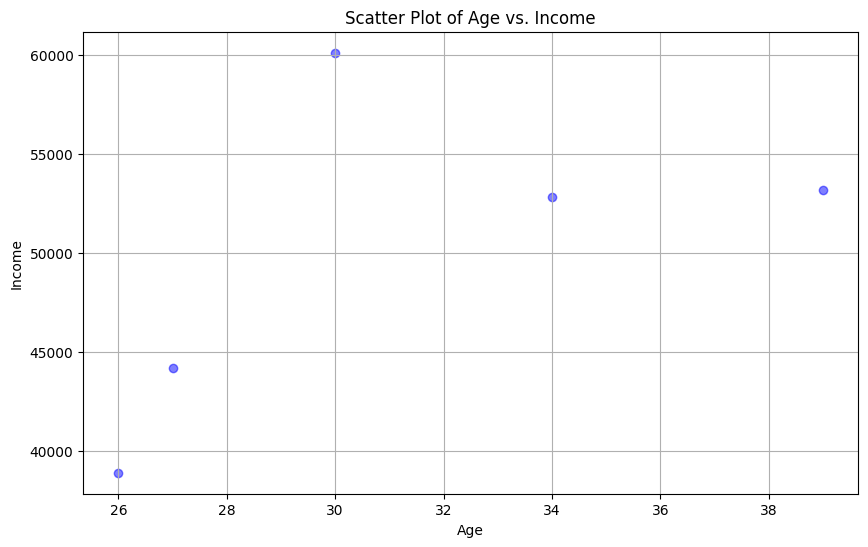

In [ ]:
run_agent('変数dfのデータでageとincomeは関係していると思いますか？')

In [ ]:
run_agent('このデータから、収入を増やすことに関する知見を得るためにはどうすればよいですか？')

収入を増やすための知見を得るためには、データ分析を通じて以下のアプローチを検討することが重要です。

1. 収入と他の変数との関係性を分析: 収入に影響を与えると考えられる他の変数（例: 教育水準、職種、勤務時間など）との相関やパターンを分析し、収入を増やすための要因を特定します。

2. 機械学習モデルを構築: 収入を予測するための機械学習モデルを構築し、重要な特徴量や影響を与える要素を特定します。予測モデルを活用して、収入を増やすための具体的な施策を立案することができます。

3. 因果関係の分析: データから因果関係を明らかにするための統計的手法や実験デザインを活用して、収入を増やすための効果的なアプローチを見つけます。

4. データの可視化と透明性: データを可視化し、ビジュアル化することで、収入に影響を与える要因やパターンを明確にし、データに基づいた意思決定を支援します。

これらのアプローチを組み合わせて収入を増やすための施策を立案し、データに基づいた戦略の構築を行うことが有効です。データ分析を通じて収入を最大化するための洞察を得ることができるでしょう。それぞれのアプローチを実装する際に必要なコードや手法について、さらに詳細な説明や支援が必要であればお知らせください。


In [ ]:
prompt_history

[{'role': 'system',
  'content': '"\nあなたは、データ分析タスクを支援するためのPythonコードを生成するAIアシスタントです。\nユーザーからの要求に基づいて、与えられたデータを活用し、以下の要件に従ってPythonコードを提供してください。\n\nコード生成の要件:\n1. コードはシンプルで読みやすいものにしてください。\n2. 変数名や関数名は明確で説明的なものを使用してください。\n3. 必要に応じて、コメントを追加して、コードの機能や目的を説明してください。\n4. 標準ライブラリを積極的に活用してください。外部ライブラリを使用する場合は、その理由を明確にしてください。\n5. ユーザー入力が必要な場合は、入力の形式と例を明示し、入力のバリデーションを行ってください。\n6. エラーハンドリングを適切に行い、わかりやすいエラーメッセージを提供してください。\n7. コードの実行結果を分かりやすく出力または説明してください。\n\n実行環境について:\n- 実行したコードはglobalにcontextを持っています。\n- contextには、タスクに関連するデータやオブジェクトが格納されています。\n- 必要なデータはcontextから取得し、効果的に活用してください。\n- データの形式や内容が不明な場合は、clarificationを求めてください。\n\nコードブロックを作成する際は、以下の形式に従ってください。\n```python\n# ここにPythonコードを記述```\n\nデータ分析のベストプラクティスに従い、効率的で再現可能なコードを心がけてください。\nユーザーとのやり取りを通じて、タスクの要件を明確にし、適切なソリューションを提供してください。\n\n'},
 {'role': 'user', 'content': 'こんにちは'},
 {'role': 'assistant',
  'content': 'こんにちは！データ分析タスクのお手伝いをします。どのような作業をお手伝いしましょうか？データセットの分析、前処理、可視化、統計解析など、お考えの内容を教えていただけますか？'},
 {'role': 'user',
  'content': '次のファイルパスのcsvをpandasのdat